In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale= 1.3)

In [20]:
data = np.loadtxt('dataset.txt')
data.shape

(12500,)

(0.0, 20.0)

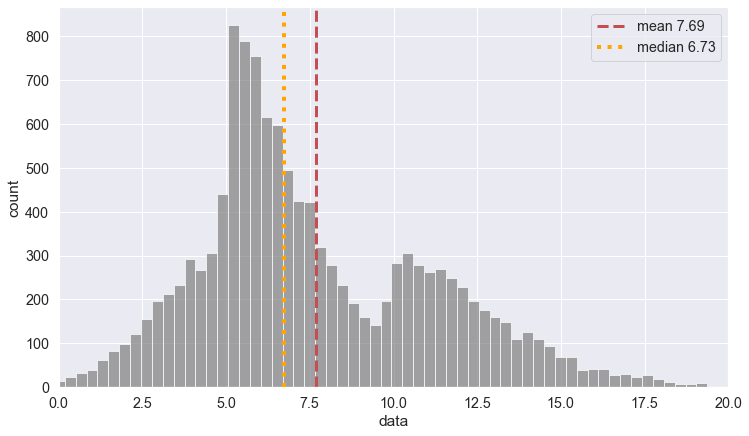

In [97]:
plt.figure(figsize=(12,7))
plt.hist(data, bins=100,alpha=0.7, color='grey');
plt.ylabel('count')
plt.xlabel('data')
plt.axvline(np.mean(data), ls='--', c='r', lw=3 , label=f'mean {np.mean(data):.2f}')
plt.axvline(np.median(data), ls=':', c='orange', lw=4 , label=f'median {np.median(data):.2f}')
#plt.axvline(np.std(data), ls='-.', c='orange', lw=3 , label=f'std {np.std(data):.2f}')
plt.legend()
plt.xlim(0,20) # x ax limit

In [62]:
outlier = np.insert(data, 0, 5000)

In [64]:
outlier.mean()

8.087403567714581

### 2. Mode

In [74]:
import scipy.stats as st

In [76]:
mode = st.mode(data)
mode

ModeResult(mode=array([5.519]), count=array([9]))

In [77]:
df= pd.DataFrame(data)

In [80]:
df.value_counts().sort_values(ascending=False)

5.519     9
5.413     8
5.472     8
5.229     8
5.397     8
         ..
14.118    1
14.119    1
14.121    1
14.125    1
30.760    1
Length: 7683, dtype: int64

In [99]:
mode

5.718619619619619

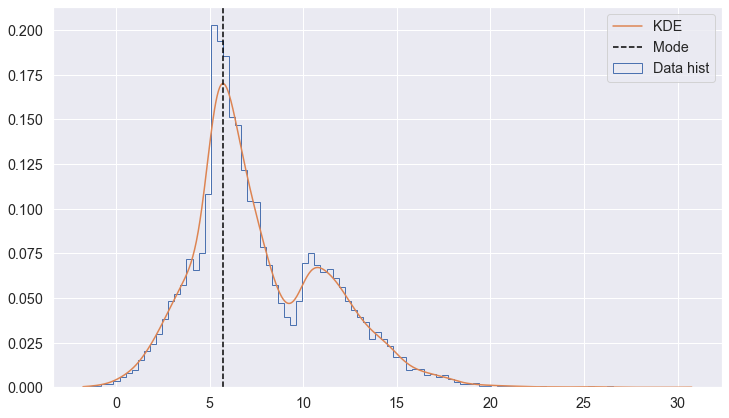

In [98]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]

plt.figure(figsize=(12,7))
plt.hist(data, bins=100, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, c='black', ls='--', label="Mode")
plt.legend();

# Comparison

Here is a comparison between mode, median and mean for the dataset:

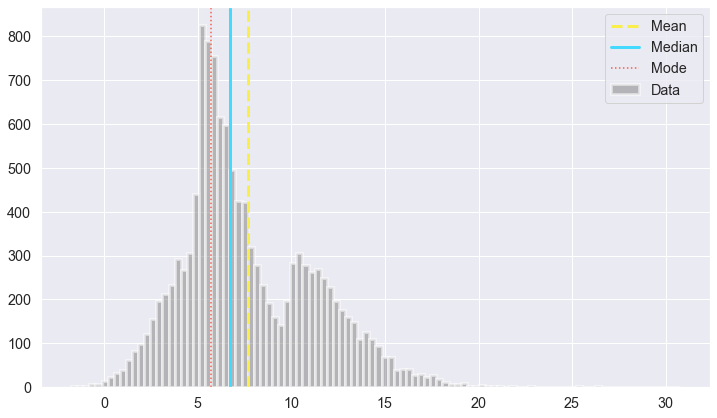

In [92]:
plt.figure(figsize=(12,7))
plt.hist(data, bins=100, label="Data", lw=3, alpha=0.5, color='grey')
plt.axvline(np.mean(data), label="Mean", lw=3, ls="--", c='#f9ee4a')
plt.axvline(np.median(data), label="Median", lw=3, ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();